In [26]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from dot_density_mapping import gen_points_in_gdf_polys, gen_random_points_poly
import pickle
from scipy.stats import spearmanr

%matplotlib inline

In [2]:
def set_zoom(ax, ref_layer, buffer = 0):
    '''Sets the zoom of a map to the extent of the reference layer.
    ax is a matplotlib axis used for plotting a map, ref_layer is a geodataframe, buffer is an additional margin around 
    the extent of the reference layer (in units of the CRS of the reference layer).'''
    minx, miny, maxx, maxy = ref_layer.total_bounds
    minx -= buffer
    maxx += buffer
    miny -= buffer
    maxy += buffer
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)

### Load Geodata

In [3]:
with open('../90 Data/compiled secondary data/msoas', 'rb') as infile:
    msoas = pickle.load(infile)
with open('../90 Data/compiled secondary data/londontube', 'rb') as infile:
    londontube = pickle.load(infile)
with open('../90 Data/compiled secondary data/londonrail', 'rb') as infile:
    londonrail = pickle.load(infile)

### Fig XX: Distribution of Population and Jobs

In [4]:
with open('../90 Data/compiled secondary data/popcounts', 'rb') as infile:
    popcounts = pickle.load(infile)
with open('../90 Data/compiled secondary data/jobcounts', 'rb') as infile:
    jobcounts = pickle.load(infile)

In [5]:
plottingsettings = {'jobcounts': {'data': jobcounts['Jobs_Total'], 'type': 'Jobs'},
                    'popcounts': {'data': popcounts['Pop_WorkingAge'], 'type': 'Working Age Population'}}
plottingdata = []

# generate randomly located point per number of counts
count_per_point = 1000
currentgeom = msoas.geometry.copy()
for dataset in plottingsettings.keys():
    currentpoints = gpd.GeoDataFrame(gen_points_in_gdf_polys(currentgeom, plottingsettings[dataset]['data'], points_per_value = count_per_point))
    currentpoints['type'] = plottingsettings[dataset]['type']
    #currentblackoutarea = currentpoints.buffer(50).unary_union # additional code to avoid points located too close to each other, but runs slowly
    #currentgeom = currentgeom.difference(currentblackoutarea)
    plottingdata.append(currentpoints)
plottingdata = gpd.GeoDataFrame(pd.concat(plottingdata))

(503574.18796895276, 561956.6879520521, 155850.7979227482, 200933.60890773044)

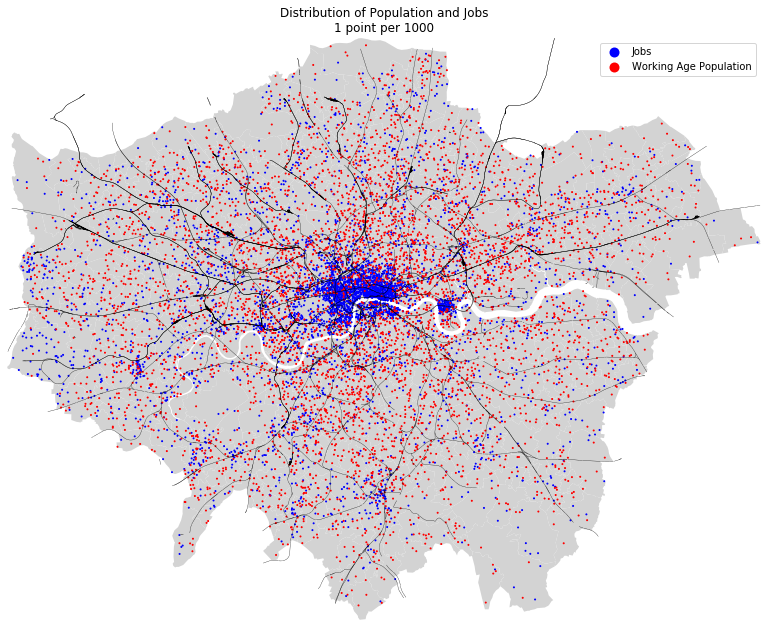

In [6]:
# plot map
fig01 = plt.figure(figsize = (13.5,12))
ax01_01 = fig01.add_subplot(111)
set_zoom(ax01_01, msoas) # setting zoom
msoas.plot(color = 'lightgrey', ax = ax01_01) # basemap
plottingdata.plot(column = 'type', ax = ax01_01, markersize = 1, categorical = True, cmap = 'bwr', legend = True) # points
londontube.plot(ax = ax01_01, linewidth = .3, color = 'black') # rail lines
londonrail.plot(ax = ax01_01, linewidth = .3, color = 'black')
plt.title('Distribution of Population and Jobs\n1 point per ' + str(count_per_point))
plt.axis('off')

### Fig XX: Distribution of Population by Age

In [19]:
plottingsettings = {'pop_young': {'data': popcounts['Pop_0_15'], 'type': 'Aged Up to 15'},
                    'pop_workingage': {'data': popcounts['Pop_WorkingAge'], 'type': 'Aged 16 to 64'},
                    'pop_old': {'data': popcounts['Pop_65_up'], 'type': 'Aged 65 and Up'}}
plottingdata = []

# generate randomly located point per number of counts
count_per_point = 500
currentgeom = msoas.geometry.copy()
for dataset in plottingsettings.keys():
    currentpoints = gpd.GeoDataFrame(gen_points_in_gdf_polys(currentgeom, plottingsettings[dataset]['data'], points_per_value = count_per_point))
    currentpoints['type'] = plottingsettings[dataset]['type']
    #currentblackoutarea = currentpoints.buffer(50).unary_union # additional code to avoid points located too close to each other, but runs slowly
    #currentgeom = currentgeom.difference(currentblackoutarea)
    plottingdata.append(currentpoints)
plottingdata = gpd.GeoDataFrame(pd.concat(plottingdata))

(503574.18796895276, 561956.6879520521, 155850.7979227482, 200933.60890773044)

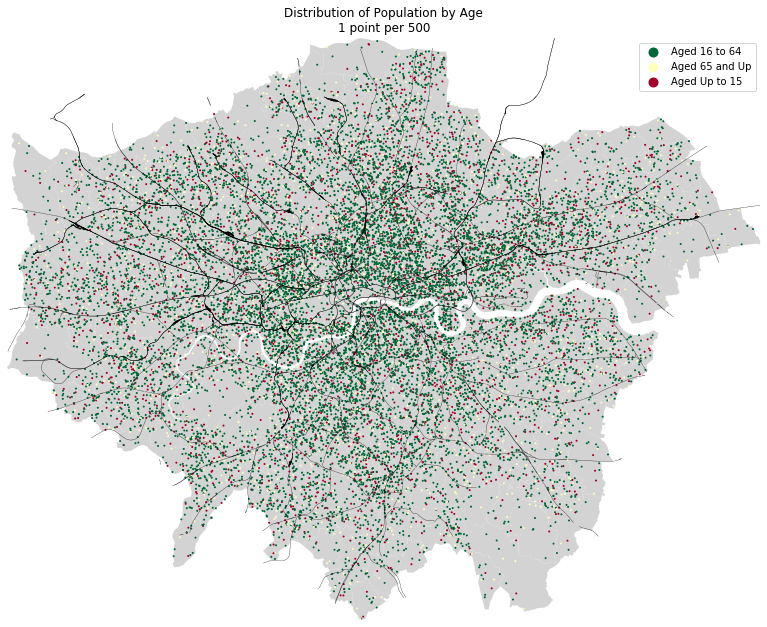

In [20]:
# plot map
fig02 = plt.figure(figsize = (13.5,12))
ax02_01 = fig02.add_subplot(111)
set_zoom(ax02_01, msoas) # setting zoom
msoas.plot(color = 'lightgrey', ax = ax02_01) # basemap
plottingdata.plot(column = 'type', ax = ax02_01, markersize = 1, categorical = True, cmap = 'RdYlGn_r', legend = True) # points
londontube.plot(ax = ax02_01, linewidth = .3, color = 'black') # rail lines
londonrail.plot(ax = ax02_01, linewidth = .3, color = 'black')
plt.title('Distribution of Population by Age\n1 point per ' + str(count_per_point))
plt.axis('off')

### Fig XX: Indicators of Disadvantage per MSOA

In [17]:
with open('../90 Data/compiled secondary data/hhincome_mean', 'rb') as infile:
    hhincome_mean = pickle.load(infile)
with open('../90 Data/compiled secondary data/hhpovrate', 'rb') as infile:
    hhpovrate = pickle.load(infile)
with open('../90 Data/compiled secondary data/unemploymentrate', 'rb') as infile:
    unemploymentrate = pickle.load(infile)
with open('../90 Data/compiled secondary data/imd_msoa', 'rb') as infile:
    imd_msoa = pickle.load(infile)

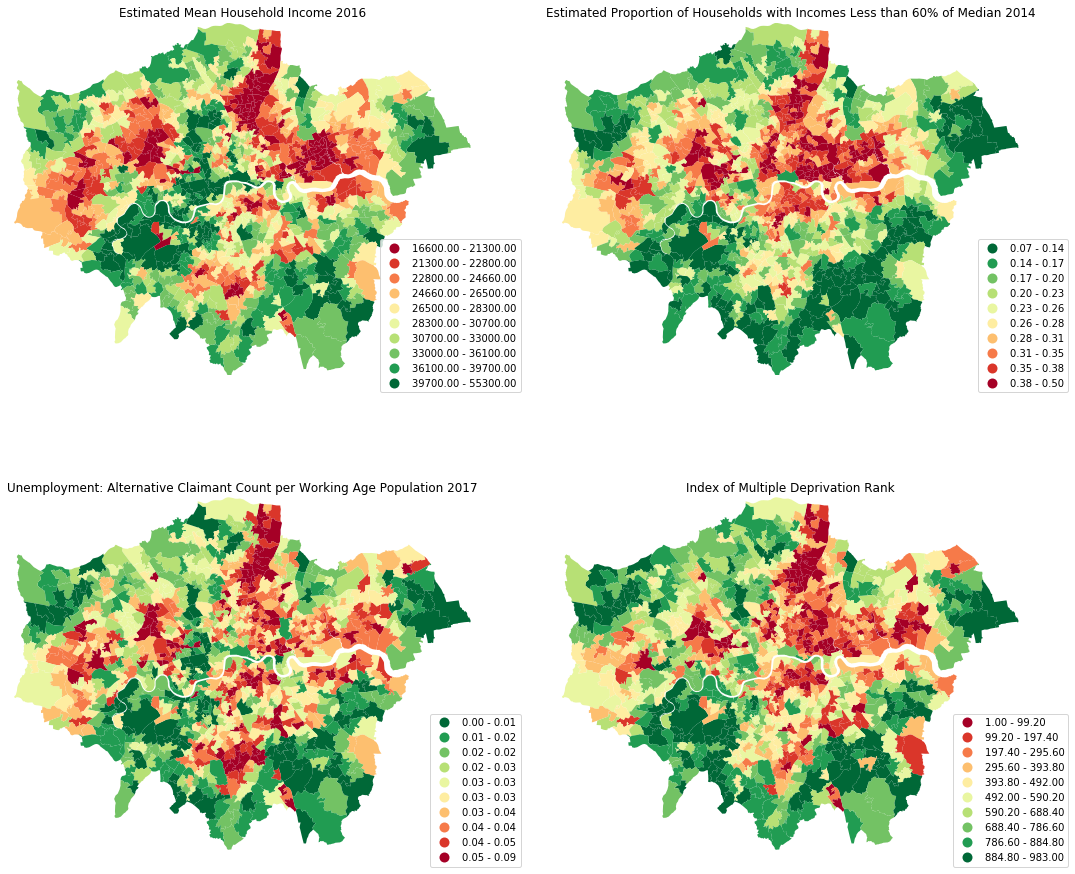

In [8]:
plottingsettings = {'Estimated Mean Household Income 2016': {'data': hhincome_mean, 'column': 'Est Mean HH Income', 'colour': 'RdYlGn'},
                    'Estimated Proportion of Households with Incomes Less than 60% of Median 2014': {'data': hhpovrate, 'column': 'PC Poor Households', 'colour': 'RdYlGn_r'},
                    'Unemployment: Alternative Claimant Count per Working Age Population 2017': {'data': unemploymentrate, 'column': 'Unemployment Rate', 'colour': 'RdYlGn_r'},
                    'Index of Multiple Deprivation Rank': {'data': imd_msoa, 'column': 'Index of Multiple Deprivation (IMD) Rank', 'colour': 'RdYlGn'}}

# plot figure
fig03 = plt.figure(figsize = (18,16))
i = 1
for dataset in plottingsettings.keys():
    ax03 = fig03.add_subplot(2,2,i)
    set_zoom(ax03, msoas) # setting zoom
    plottingdata = msoas.join(plottingsettings[dataset]['data'])
    plottingdata.plot(column = plottingsettings[dataset]['column'], ax = ax03, scheme = 'quantiles', k = 10, 
                      cmap = plottingsettings[dataset]['colour'], legend = True)
    legend03 = ax03.get_legend()
    legend03.set_bbox_to_anchor((1.12,.4))
    plt.axis('off')
    plt.title(dataset)
    i += 1

Text(0.5, 1.0, 'Percent of All Working Age Residents in\nMSOAs by IMD Rank Decile')

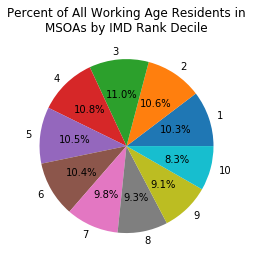

In [25]:
# proportion of all working-age residents in MSOAs in each decile of IMD rank
imd_msoa['IMD Decile'] = (imd_msoa['Index of Multiple Deprivation (IMD) Rank'] - 1) // (len(imd_msoa) / 10)
plt.pie(imd_msoa.join(popcounts[['Pop_WorkingAge']]).groupby('IMD Decile').sum().loc[:,'Pop_WorkingAge'],
        labels = [i + 1 for i in range(10)], autopct='%1.1f%%')
plt.title('Percent of All Working Age Residents in\nMSOAs by IMD Rank Decile')

In [32]:
# spearman rank correlation between deprivation indicators
for data in [hhincome_mean['Est Mean HH Income'], hhpovrate['PC Poor Households'], unemploymentrate['Unemployment Rate']]:
    print('IMD Rank &', data.name, spearmanr(imd_msoa['Index of Multiple Deprivation (IMD) Rank'], data)[0])


IMD Rank & Est Mean HH Income 0.8124213607813265
IMD Rank & PC Poor Households -0.8607721113390158
IMD Rank & Unemployment Rate -0.8991868703733354


### Fig XX: Distribution of Housing by Council Tax Bands

In [23]:
with open('../90 Data/compiled secondary data/housing', 'rb') as infile:
    housing = pickle.load(infile)

In [24]:
plottingsettings = {'Bands ABC': {'data': housing['ABC'], 'type': 'Bands ABC'},
                    'Bands DEF': {'data': housing['DEF'], 'type': 'Bands DEF'},
                    'Bands GH': {'data': housing['GH'], 'type': 'Bands GH'}}
plottingdata = []

# generate randomly located point per number of counts
count_per_point = 100
currentgeom = msoas.geometry.copy()
for dataset in plottingsettings.keys():
    currentpoints = gpd.GeoDataFrame(gen_points_in_gdf_polys(currentgeom, plottingsettings[dataset]['data'], points_per_value = count_per_point))
    currentpoints['type'] = plottingsettings[dataset]['type']
    #currentblackoutarea = currentpoints.buffer(50).unary_union # additional code to avoid points located too close to each other, but runs slowly
    #currentgeom = currentgeom.difference(currentblackoutarea)
    plottingdata.append(currentpoints)
plottingdata = gpd.GeoDataFrame(pd.concat(plottingdata))


(503574.18796895276, 561956.6879520521, 155850.7979227482, 200933.60890773044)

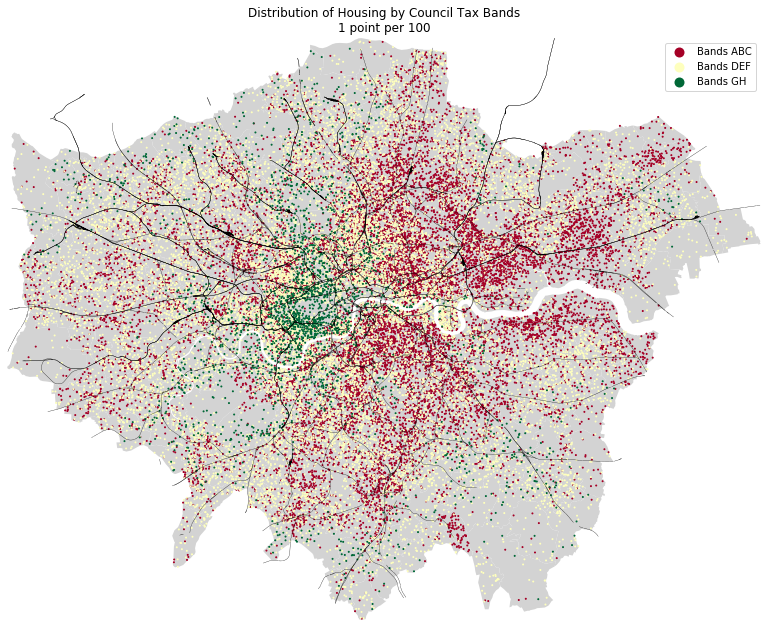

In [25]:
# plot map
fig04 = plt.figure(figsize = (13.5,12))
ax04_01 = fig04.add_subplot(111)
set_zoom(ax04_01, msoas) # setting zoom
msoas.plot(color = 'lightgrey', ax = ax04_01) # basemap
plottingdata.plot(column = 'type', ax = ax04_01, markersize = 1, categorical = True, cmap = 'RdYlGn', legend = True) # points
londontube.plot(ax = ax04_01, linewidth = .3, color = 'black') # rail lines
londonrail.plot(ax = ax04_01, linewidth = .3, color = 'black')
plt.title('Distribution of Housing by Council Tax Bands\n1 point per ' + str(count_per_point))
plt.axis('off')